In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\Fatman\Documents\adult.data.csv')

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [9]:
filt = (df['sex'] == 'Female')
avg_a_f = df.loc[filt, 'age'].mean()
print(f"The average age of women is {round(avg_a_f)}.")

The average age of women is 37.


In [10]:
filt = df['native-country'] == 'Germany'
p_of_g = df.loc[filt, 'native-country'].count() / df.shape[0]
print(f"The percentage of German citizens is {p_of_g}.")

The percentage of German citizens is 0.004207487485028101.


In [11]:
# Approach 1:

s1 = df.loc[df['salary'] == '>50K', 'age']
s2 = df.loc[df['salary'] == '<=50K', 'age']
print(f"The mean value and standard deviation of the age of those who receive more than 50K per year(rich) is {round(s1.mean())} and {round(s1.std())}.")
print(f"The mean value and standard deviation of the age of those who receive less than 50K per year(poor) is {round(s2.mean())} and {round(s2.std())}.")

The mean value and standard deviation of the age of those who receive more than 50K per year(rich) is 44 and 11.
The mean value and standard deviation of the age of those who receive less than 50K per year(poor) is 37 and 14.


In [12]:
# Approach 2:

sal_group = df.groupby('salary')[ 'age'].agg(['mean', 'std'])
sal_group

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


In [13]:
filt = (df['salary'] == '>50K')
print(df.loc[filt, 'education'].unique())
print("\nNo, it's not true that people who earn more than 50K have at least high school education.")

['HS-grad' 'Masters' 'Bachelors' 'Some-college' 'Assoc-voc' 'Doctorate'
 'Prof-school' 'Assoc-acdm' '7th-8th' '12th' '10th' '11th' '9th' '5th-6th'
 '1st-4th']

No, it's not true that people who earn more than 50K have at least high school education.


In [14]:
grp_r_s = df.groupby(['race', 'sex'])
grp_r_s['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [15]:
max_age = grp_r_s.get_group(('Amer-Indian-Eskimo', 'Male'))['age'].max()
print(f"The maximum age of men of Amer-Indian-Eskimo race is {round(max_age)}.")

The maximum age of men of Amer-Indian-Eskimo race is 82.


In [16]:
# Married men

filt = (df['sex'] == 'Male') & (df['marital-status'].str.startswith('Married'))
df[filt]['salary'].value_counts(normalize = True)

salary
<=50K    0.559486
>50K     0.440514
Name: proportion, dtype: float64

In [17]:
# Single men

filt = (df['sex'] == 'Male') & ~(df['marital-status'].str.startswith('Married'))
df[filt]['salary'].value_counts(normalize = True)

salary
<=50K    0.915505
>50K     0.084495
Name: proportion, dtype: float64

In [18]:
max_load = df['hours-per-week'].max()
#df['hours-per-week'].value_counts()
print(f"Maximum number of hours a person works per week is {max_load}.")

Maximum number of hours a person works per week is 99.


In [19]:
num_workaholics = df[df['hours-per-week'] == filt].shape[0]
print(f"Number of people that work such a number of hours is {num_workaholics}.")

Number of people that work such a number of hours is 4.


In [20]:
filter1 = (df['hours-per-week'] == df['hours-per-week'].max())
who_work_for_max_hperw = df.loc[filter1].shape[0]

In [21]:
filter2 = (df['hours-per-week'] == df['hours-per-week'].max()) & (df['salary'] == '>50K')
who_work_for_max_hperw_with_hs = df.loc[filter2].shape[0]

In [22]:
calc = who_work_for_max_hperw_with_hs / who_work_for_max_hperw * 100
print(f"Percentage of people who work for maximum no.of weeks with higher salary is {round(calc)}%.")

Percentage of people who work for maximum no.of weeks with higher salary is 29%.


In [23]:
grp_n_s = df.groupby(['native-country', 'salary'])['hours-per-week'].mean()
grp_n_s

native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64

In [24]:
grp_n_s['Japan']

salary
<=50K    41.000000
>50K     47.958333
Name: hours-per-week, dtype: float64

In [25]:
print(f"Average time of work (hours-per-week) for those who earn a little in Japan is {grp_n_s['Japan'][0]}.")
print(f"Average time of work (hours-per-week) for those who earn a lot in Japan is {grp_n_s['Japan'][1]}.")

Average time of work (hours-per-week) for those who earn a little in Japan is 41.0.
Average time of work (hours-per-week) for those who earn a lot in Japan is 47.958333333333336.


In [26]:
pivot_table_df = df.pivot_table(index='marital-status', columns=['sex', 'salary'], aggfunc='size', fill_value=0)
print(pivot_table_df)

sex                   Female       Male      
salary                 <=50K >50K <=50K  >50K
marital-status                               
Divorced                2493  179  1487   284
Married-AF-spouse          8    6     5     4
Married-civ-spouse       903  754  7381  5938
Married-spouse-absent    194   11   190    23
Never-married           4601  166  5591   325
Separated                614   17   345    49
Widowed                  779   46   129    39


<Axes: xlabel='sex-salary', ylabel='marital-status'>

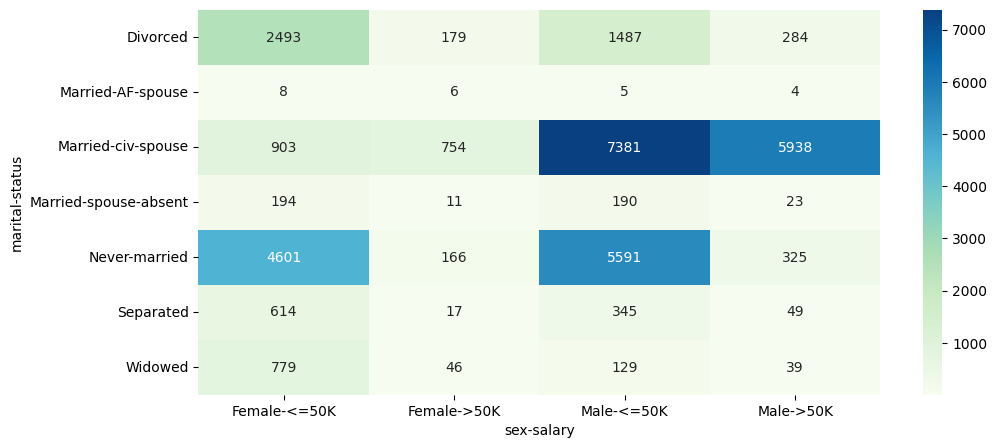

In [33]:
plt.figure(figsize=(11, 5))
sns.heatmap(pivot_table_df, cmap="GnBu", annot = True, fmt = ".0f")

<Axes: xlabel='hours-per-week', ylabel='Density'>

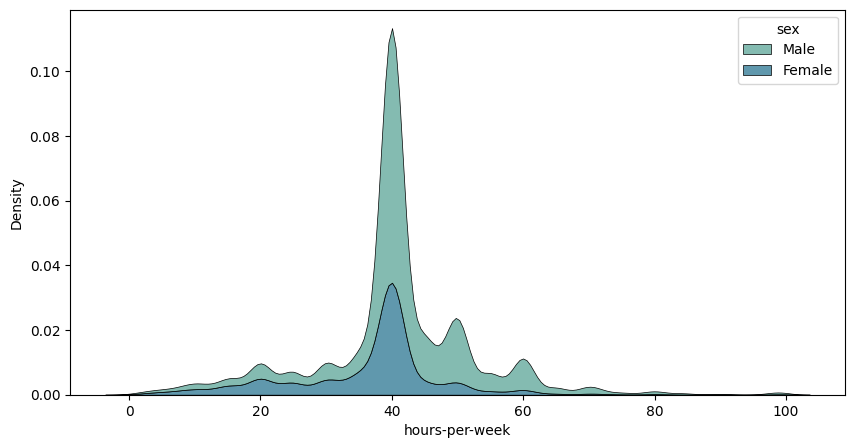

In [36]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data = df, x="hours-per-week", hue = 'sex', multiple = 'stack', alpha=.7, linewidth = 0.5, palette = 'crest')

<Axes: xlabel='salary', ylabel='hours-per-week'>

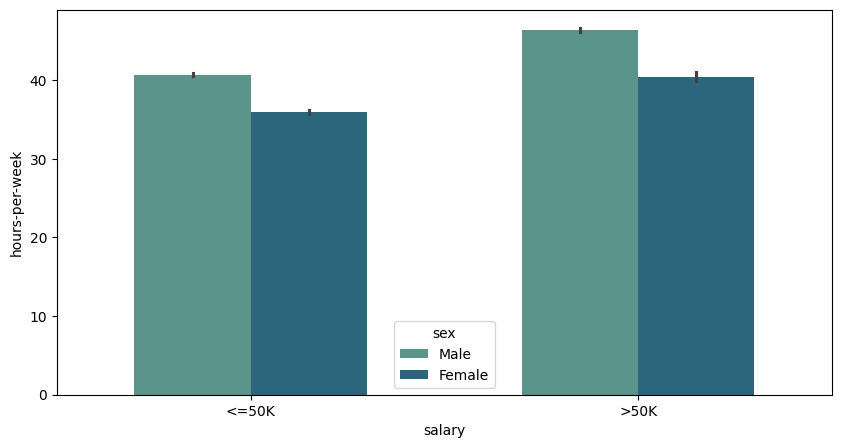

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data = df, x = 'salary', y = 'hours-per-week', hue = "sex", width = 0.6, palette = "crest")

In [30]:
4. How does the count of records vary with different combinations of age and hours worked per week?

Object `week` not found.


<Axes: xlabel='hours-per-week', ylabel='age'>

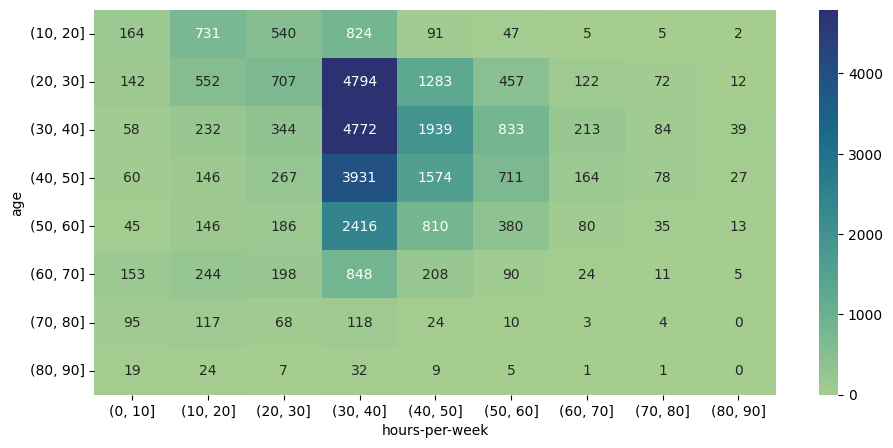

In [38]:
# Define bins for 'age' and 'hours-per-week'
plt.figure(figsize=(11,5))
bins_age = pd.cut(df['age'], bins=range(0, 100, 10))
# bins_age_as_strings = bins_age.astype(str).str.replace(r'[\(\]]' , ' ', regex = True).replace(r'[\,]' , ' -', regex = True)
bins_hours_per_week = pd.cut(df['hours-per-week'], bins=range(0, 100, 10))
heatmap_data = pd.crosstab(bins_age, bins_hours_per_week)

sns.heatmap(heatmap_data, cmap='crest', annot = True, fmt=".0f")

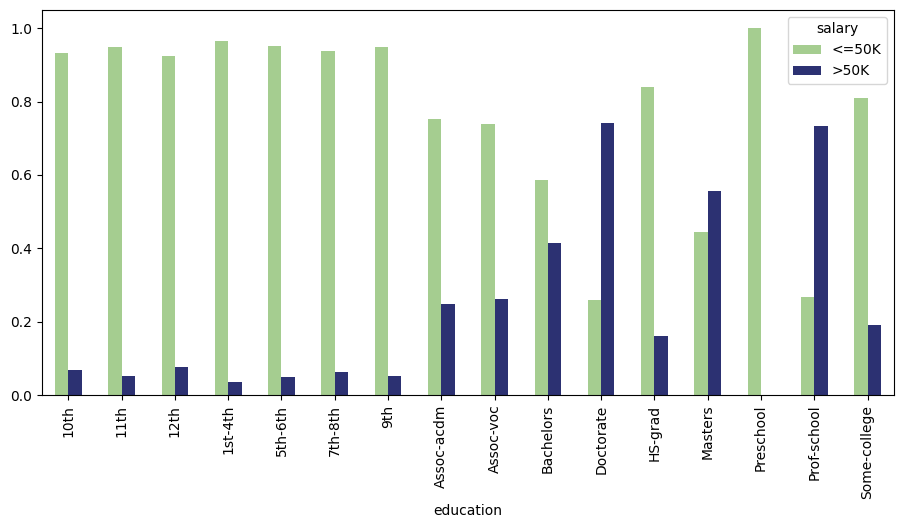

In [40]:
fig, ax = plt.subplots(figsize=(11, 5))
df.groupby(['education'])['salary'].value_counts(normalize=True).unstack().plot(kind='bar', cmap = "crest", ax=ax)
plt.show()